<a href="https://colab.research.google.com/github/emanalnairat/chica/blob/main/Supermarket_Analytics__Emanalnairat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**Load and read of data**

In [ ]:
df = pd.read_csv('/content/supermarket_sales.csv')

**Display the first 5 rows of the data**

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Get information about our dataset like total number rows, total number columns, data type of each columns and memory requirment.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Removes duplicate rows from df in place**

In [ ]:
drop=df.drop_duplicates(inplace=True)
drop

**Rename the names of some columns.**

In [ ]:
df= df.rename(columns={"Total":"Revenue","cogs":"Cost_of_Goods_Sold","Invoice ID":"Invoice_ID","Product line":"Product_line","gross income":"gross_income","gross margin percentage":"gross_margin_percentage","Customer type":"Customer_type","Unit price":"Unit_price"})

In [ ]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax 5%', 'Revenue', 'Date',
       'Time', 'Payment', 'Cost_of_Goods_Sold', 'gross_margin_percentage',
       'gross_income', 'Rating'],
      dtype='object')

**Convert the data and Time type from object to datetime**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

**Count of Activities by Time Period**

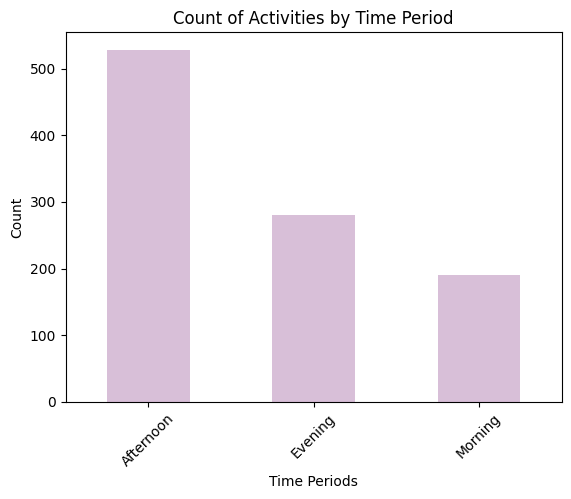

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

def categorize_time(hour): #Define a function to categorize the time into periods
    if 0 <= hour < 6:
        return "Early Morning"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Invalid time"

df['Period'] = df['Time'].apply(categorize_time)
df['Period'].value_counts().sort_index().plot(kind='bar',color='#D8BFD8')
plt.title('Count of Activities by Time Period')
plt.xlabel('Time Periods')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 **Conclusion**:

 We notice that the highest activity occurs in the "Afternoon" period. This insight suggests that most activities or events are concentrated during the afternoon, which can help guide scheduling strategies or resource allocation. Understanding peak times can assist in optimizing operations or marketing efforts to align with when users are most active.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product_line             1000 non-null   object        
 6   Unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Revenue                  1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   int32         
 12  Payment                  1000 non-n

**Add a month column from the date and a week start dt column**

In [ ]:
df["month"]= df["Date"].dt.month

In [ ]:
df['week_start_dt'] = df['Date'] - pd.to_timedelta(df['Date'].dt.weekday, unit='D')

In [ ]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax 5%', 'Revenue', 'Date',
       'Time', 'Payment', 'Cost_of_Goods_Sold', 'gross_margin_percentage',
       'gross_income', 'Rating', 'Period', 'month', 'week_start_dt'],
      dtype='object')

**Recalculate the tax column**

In [ ]:
df.loc[:,'Tax 5%'] = df['gross_income'] * 0.05


**Convert the value in the profit margin column to %.**

In [ ]:
df['gross_margin_percentage'] = df['gross_margin_percentage'].map(lambda x: "{:.2f}%".format(x))

In [ ]:
df.head(5)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Revenue,Date,Time,Payment,Cost_of_Goods_Sold,gross_margin_percentage,gross_income,Rating,Period,month,week_start_dt
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1.307075,548.9715,2019-01-05,13,Ewallet,522.83,4.76%,26.1415,9.1,Afternoon,1,2018-12-31
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,0.191000,80.2200,2019-03-08,10,Cash,76.40,4.76%,3.8200,9.6,Morning,3,2019-03-04
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,0.810775,340.5255,2019-03-03,13,Credit card,324.31,4.76%,16.2155,7.4,Afternoon,3,2019-02-25
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1.164400,489.0480,2019-01-27,20,Ewallet,465.76,4.76%,23.2880,8.4,Evening,1,2019-01-21
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,1.510425,634.3785,2019-02-08,10,Ewallet,604.17,4.76%,30.2085,5.3,Morning,2,2019-02-04


**Get overall statistics about the dataset.**

In [ ]:
df.describe()

,Unit_price,Quantity,Tax 5%,Revenue,Date,Time,Cost_of_Goods_Sold,gross_income,Rating,month,week_start_dt
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000
mean,55.672130,5.510000,0.768968,322.966749,2019-02-14 00:05:45.600000,14.910000,307.58738,15.379369,6.97270,1.993000,2019-02-10 23:19:40.800000
min,10.080000,1.000000,0.025425,10.678500,2019-01-01 00:00:00,10.000000,10.17000,0.508500,4.00000,1.000000,2018-12-31 00:00:00
25%,32.875000,3.000000,0.296244,124.422375,2019-01-24 00:00:00,12.000000,118.49750,5.924875,5.50000,1.000000,2019-01-21 00:00:00
50%,55.230000,5.000000,0.604400,253.848000,2019-02-13 00:00:00,15.000000,241.76000,12.088000,7.00000,2.000000,2019-02-11 00:00:00
75%,77.935000,8.000000,1.122262,471.350250,2019-03-08 00:00:00,18.000000,448.90500,22.445250,8.50000,3.000000,2019-03-04 00:00:00
max,99.960000,10.000000,2.482500,1042.650000,2019-03-30 00:00:00,20.000000,993.00000,49.650000,10.00000,3.000000,2019-03-25 00:00:00
std,26.494628,2.923431,0.585441,245.885335,NaN,3.186857,234.17651,11.708825,1.71858,0.835254,NaN


**Count of Transactions by Payment Method use barchart**

In [ ]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

Text(0.5, 1.0, 'Count of Transactions by Payment Method')

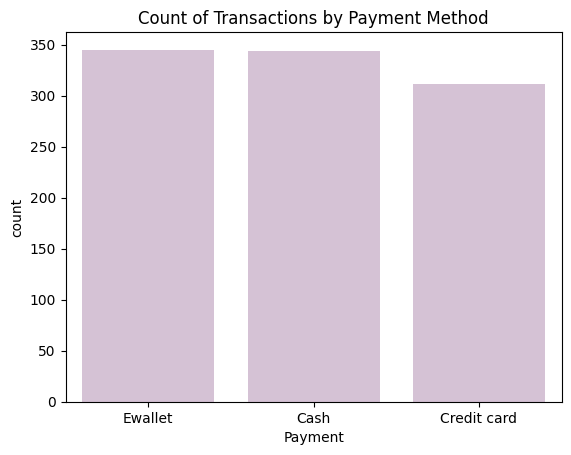

In [ ]:
sns.countplot(x = df['Payment'],color='#D8BFD8')
plt.title("Count of Transactions by Payment Method")

In [ ]:
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


**Insight:**
The data reveals that "e-wallet" is the most popular payment method, with 345 transactions, closely followed by cash at 344 transactions, and credit cards at 311 transactions. This indicates a strong preference for digital payment options among customers, suggesting that businesses should continue to enhance and promote e-wallet services. The nearly equal count for cash transactions highlights the ongoing relevance of traditional payment methods, while the credit card usage, though slightly lower, remains significant. Understanding these trends can help businesses tailor their payment options and marketing strategies to meet customer preferences effectively.






**Revenue Performance by Time Period uesd linechart**

In [ ]:
sum_Revenue_by_period=df.groupby("Period")["Revenue"].sum().reset_index()
sum_Revenue_by_period

,Period,Revenue
0,Afternoon,172468.5585
1,Evening,88699.3800
2,Morning,61798.8105


In [ ]:
fig = px.bar(sum_Revenue_by_period, x='Period', y='Revenue',
             title='Revenue Performance by Time Period',color_discrete_sequence=['#D8BFD8'])
fig.show()


**Insight:**
The revenue data indicates that the highest revenue period is the Afternoon, generating approximately 172,468.56. This is significantly higher than the Evening, which accounts for around 88,699.38, and the Morning at 61,798.81
Businesses should consider enhancing marketing strategies, promotions, and staffing during this time to maximize revenue.
Improving Payment Processes:
Offering faster payment options or technologies such as mobile payments can help alleviate congestion.
Task Distribution:
Organizing work teams with specific tasks can contribute to enhancing efficiency.





**Gross Income Performance by Date used linechart**

In [ ]:
sum_income_by_Date=df.groupby("Date")["gross_income"].sum().reset_index()
sum_income_by_Date


,Date,gross_income
0,2019-01-01,225.9610
1,2019-01-02,92.6430
2,2019-01-03,98.9585
3,2019-01-04,77.3185
4,2019-01-05,168.4135
...,...,...
84,2019-03-26,93.4530
85,2019-03-27,138.2295
86,2019-03-28,106.1620
87,2019-03-29,191.5830


In [ ]:
fig = px.line(sum_income_by_Date, x="Date", y="gross_income", title='Gross Income Performance by Date', markers = True,color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insight:**
The data shows daily gross income values over a period in 2019. Here are some key observations:

Daily Variability: The gross income fluctuates significantly from day to day, indicating varying levels of sales or customer activity. For instance, the income peaked at 225.96 on January 1, while some days recorded much lower values, like 77.32 on January 4.

Trend Analysis: Identifying patterns in the data, such as consistent increases or declines over certain periods, can provide insights into seasonal trends or the impact of specific events or promotions.

Potential Peaks: The highest recorded income (225.96) suggests a possible peak due to events or promotions. Further investigation into those specific dates could reveal what drove higher sales.

**Highest Months For Sales used barchart**

In [ ]:
df["month"].unique()

array([1, 3, 2], dtype=int32)

In [ ]:
month={
    1:'Jan',
    2:'Feb',
    3:'March'
}   ## Define a dictionary to represent months using numbers as keys and names as values

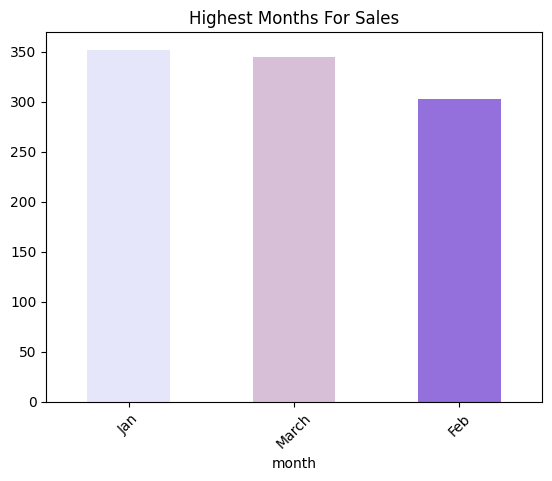

In [ ]:
df['month']=df['Date'].dt.month.map(month)
df['month'].value_counts().plot(kind='bar',color=['#E6E6FA', '#D8BFD8', '#9370DB'])
plt.title('Highest Months For Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['month'].value_counts()

,count
month,
Jan,352
March,345
Feb,303


**Insight:**

January Dominance: January has the highest transactions (352), likely due to post-holiday sales, indicating strong customer engagement.

Consistent Performance: March follows closely with 345 transactions, suggesting steady activity potentially linked to effective marketing or seasonal trends.

February's Dip: February records the lowest transactions (303), possibly due to fewer shopping events or a post-holiday slowdown.

Recommendations
Leverage January Trends: Analyze successful strategies from January to replicate in other months.
Boost February Engagement: Implement targeted promotions to increase transactions in February.
Monitor Seasonal Trends: Continuously track monthly performance to adapt marketing strategies effectively.




**Gender counts Distribution used pie chart**

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
a , b = df['Gender'].value_counts().index , df['Gender'].value_counts().values

In [ ]:
Gender_counts = {}

for i , e in  zip(a , b):
  Gender_counts[i] = e


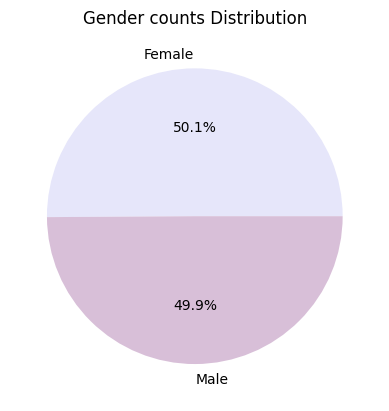

In [ ]:
labels = Gender_counts.keys()
values = Gender_counts.values()
colors = ['#E6E6FA', '#D8BFD8']
plt.pie(values, labels=labels, autopct='%1.1f%%',colors=colors)

plt.title('Gender counts Distribution')

plt.show()

In [ ]:
df['Gender'].value_counts()


,count
Gender,
Female,501
Male,499


**Insight:**

The pie chart displaying the distribution of transactions by gender reveals the following:

Balance Between Genders: The data shows that the number of transactions for females is 501, while for males it is 499, indicating a strong balance between the two genders in the customer base.

Equal Opportunities: This balanced distribution suggests that businesses have an equal opportunity to target both genders in their marketing campaigns.

Tailored Strategies: This information can be leveraged to develop marketing strategies specifically aimed at each gender, considering the different interests they may have.

**Recommendations:**
Behavior Analysis: Conduct deeper analysis to understand the purchasing behavior of each gender, which could provide additional insights for improving products or services.

Customized Offers: Develop targeted promotions or marketing campaigns for each gender to enhance engagement and increase sales.

**Distribution of Gender by Product Line**





In [ ]:
count_data = df.value_counts(['Gender', 'Product_line']).unstack()

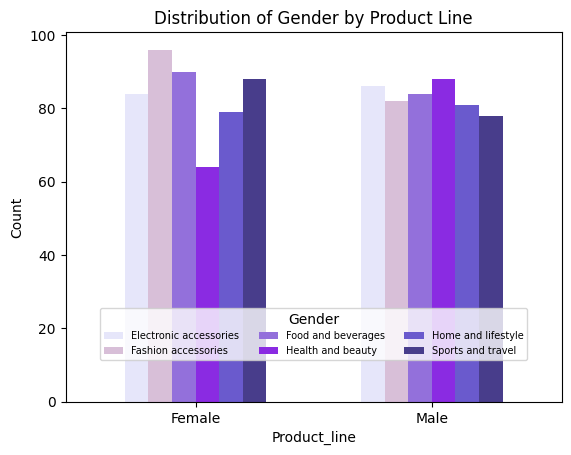

In [ ]:
colors = ['#E6E6FA', '#D8BFD8', '#9370DB', '#8A2BE2', '#6A5ACD', '#483D8B']
count_data.plot(kind='bar', width=0.6,color=colors)
plt.title('Distribution of Gender by Product Line')
plt.xlabel('Product_line')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender',prop={'size':7},loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=3)
plt.show()

In [ ]:
df[['Product_line','Gender']].value_counts()

Product_line            Gender
Fashion accessories     Female    96
Food and beverages      Female    90
Health and beauty       Male      88
Sports and travel       Female    88
Electronic accessories  Male      86
                        Female    84
Food and beverages      Male      84
Fashion accessories     Male      82
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Male      78
Health and beauty       Female    64
Name: count, dtype: int64

**Insight:**

Female Preference: Women favor "Fashion Accessories" (96 transactions) and "Food and Beverages" (90 transactions), indicating a strong market for these categories.

Male Engagement: Men show higher engagement in "Health and Beauty" (88 transactions) and "Electronic Accessories" (86 transactions), suggesting these products appeal to male customers.

Diverse Interests: Both genders express interest in various product lines, emphasizing the need for a diverse product range.

Targeted Marketing Opportunities: The differences in transaction counts highlight potential for tailored marketing strategies, such as promotions for "Fashion Accessories" to attract more female customers and campaigns for "Health and Beauty" to engage male customers.

**City Distribution used piechart**

In [ ]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'count']

In [ ]:
fig = px.pie(city_counts, names='City', values='count', title='City Distribution', color_discrete_sequence= ['#E6E6FA', '#D8BFD8', '#9370DB'])
fig.show()

In [ ]:
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


**Insight:**
Yangon's Dominance: Yangon has 340 transactions, highlighting it as the main business hub, likely due to higher population density.

Mandalay's Strong Presence: With 332 transactions, Mandalay shows robust activity, indicating potential for market expansion.

Low Activity in Naypyitaw: Naypyitaw's 32 transactions suggest a need for better marketing efforts.

**Recommendations:**
Enhance Campaigns in Naypyitaw: Implement targeted marketing to increase awareness and demand.

Invest in Yangon and Mandalay: Focus on improving services and promotions to build loyalty in these cities.

Monitor Performance: Continuously track performance to adapt strategies as needed.





**total Quantity over the Gender per City**

In [ ]:
total_Quantity_group = df.groupby(['City','Gender']).agg({"Quantity":'sum'}).reset_index()
total_Quantity_group

,City,Gender,Quantity
0,Mandalay,Female,911
1,Mandalay,Male,909
2,Naypyitaw,Female,1049
3,Naypyitaw,Male,782
4,Yangon,Female,909
5,Yangon,Male,950


In [ ]:
fig = px.bar(total_Quantity_group , x='Gender', y='Quantity',color='City', text="City",title = 'Total Quantity over the Gender per City',color_discrete_sequence=['#483D8B', '#D8BFD8', '#9370DB'])

fig.show()

**Insight:**

Naypyitaw Female Dominance: Female customers lead with 1,049 units, indicating strong purchasing power and a target for female-focused marketing.

Mandalay Gender Balance: Purchases are nearly equal (911 females vs. 909 males), suggesting opportunities for campaigns appealing to both genders.

Yangon Male Engagement: Males purchase 950 units, indicating potential for marketing strategies to boost female purchases.

**Recommendations:**
Targeted Campaigns in Naypyitaw: Focus on female consumers to leverage their purchasing power.

Balanced Marketing in Mandalay: Implement campaigns that cater to both genders.

Enhance Female Engagement in Yangon: Develop strategies to encourage more female purchases for balance

**Distribution of City by Product Line**

In [ ]:
df['Product_line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [ ]:
count_data = df.value_counts(['City', 'Product_line']).unstack()

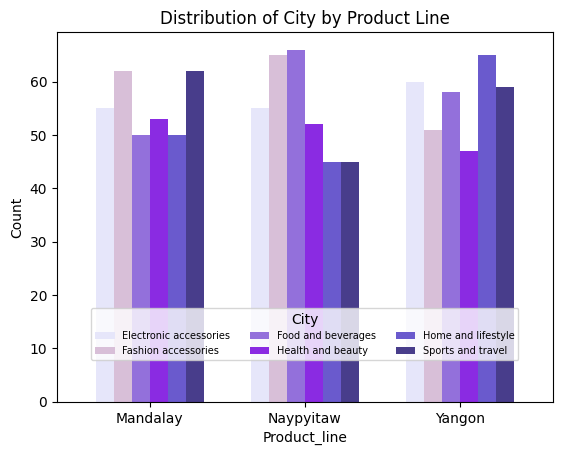

In [ ]:
colors = ['#E6E6FA', '#D8BFD8', '#9370DB', '#8A2BE2', '#6A5ACD', '#483D8B']
count_data.plot(kind='bar', width=0.7,color=colors)
plt.title('Distribution of City by Product Line')
plt.xlabel('Product_line')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='City',prop={'size':7},loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=3)
plt.show()

In [ ]:
df[['Product_line','City']].value_counts()

,,count
Product_line,City,
Food and beverages,Naypyitaw,66
Fashion accessories,Naypyitaw,65
Home and lifestyle,Yangon,65
Fashion accessories,Mandalay,62
Sports and travel,Mandalay,62
Electronic accessories,Yangon,60
Sports and travel,Yangon,59
Food and beverages,Yangon,58
Electronic accessories,Naypyitaw,55


**Insight:**
Naypyitaw Demand: Strong interest in "Food and Beverages" and "Fashion Accessories" (66 and 65 transactions respectively) suggests opportunities for enhanced promotions in these areas.

Mandalay Competition: Balanced transactions between "Fashion Accessories" and "Sports and Travel" (62 each) indicate diverse consumer interests, highlighting the need for improved marketing strategies.

Yangon Variety: "Home and Lifestyle" and "Electronic Accessories" show good performance (65 and 60 transactions), indicating a market that requires diverse offerings.

Health and Beauty Opportunities: Lower sales in this category suggest potential for new product development and targeted marketing efforts.

**Recommendations:**
Naypyitaw: Increase promotions for "Food and Beverages" and "Fashion Accessories" to attract more customers.
Mandalay: Implement targeted marketing campaigns for "Sports and Travel" and "Fashion Accessories."
Yangon: Develop more products in the "Health and Beauty" category and enhance promotions to stimulate demand.




**The Highest Unit Price In The Product line**

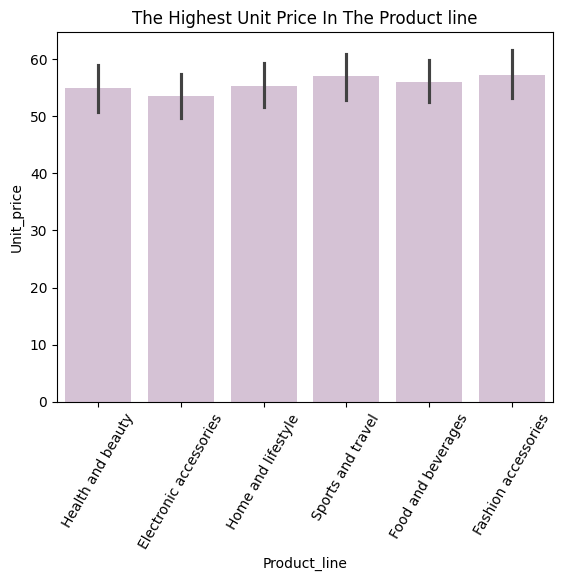

In [ ]:
sns.barplot(x='Product_line', y='Unit_price',color='#D8BFD8', data=df)
plt.xticks(rotation=60)
plt.title('The Highest Unit Price In The Product line')
plt.show()

In [ ]:
df[['Product_line','Unit_price']].value_counts()

Product_line            Unit_price
Home and lifestyle      34.42         2
                        78.38         2
Electronic accessories  52.89         2
Sports and travel       45.58         2
Fashion accessories     99.82         2
                                     ..
                        98.70         1
                        98.98         1
                        99.10         1
                        99.25         1
Sports and travel       99.96         1
Name: count, Length: 993, dtype: int64

**Insight:**
Price Range Overview: "Fashion Accessories" have the highest unit prices, indicating a premium market focus and potential for higher profit margins.

Mid-Range Pricing: "Electronic Accessories" and "Sports and Travel" are priced mid-range, appealing to a broader audience while maintaining decent margins.

Budget-Friendly Options: "Home and Lifestyle" products are lower-priced, targeting budget-conscious consumers. Strategies are needed to enhance their perceived value.

Price Variability: Variations in unit prices within product lines suggest a diverse range of offerings, which can attract different customer segments but may cause confusion.

**Recommendations:**
Premium Marketing for Fashion Accessories: Emphasize quality and exclusivity in marketing campaigns.
Promote Electronic Accessories: Implement promotional strategies to boost visibility and sales.
Enhance Value in Home and Lifestyle: Focus on marketing the benefits and quality to attract more consumers.

**Scatter Plot for Unit Price and Quantity**

<Axes: xlabel='Unit_price', ylabel='Quantity'>

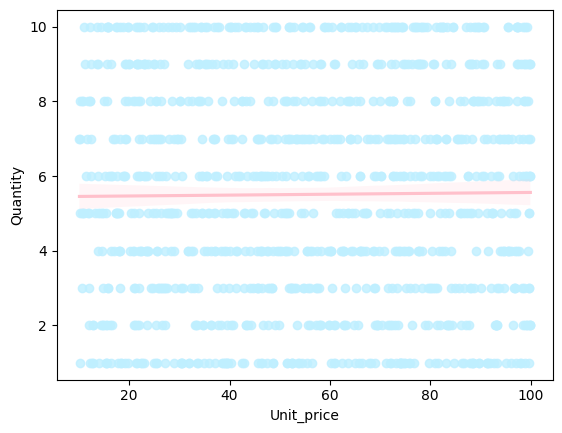

In [ ]:
sns.regplot(x = 'Unit_price',y = 'Quantity',data = df,scatter_kws={'color': '#BFEFFF'},line_kws={'color': 'pink'})


In [ ]:
df[['Unit_price','Quantity']].corr()

,Unit_price,Quantity
Unit_price,1.000000,0.010778
Quantity,0.010778,1.000000


**insight:**
Correlation Analysis: The correlation coefficient between unit price and quantity is approximately 0.010778, indicating a very weak positive correlation. This suggests that changes in unit price have little to no effect on the quantity sold, meaning pricing adjustments may not significantly influence demand.
**Recommendations:**
Understand Customer Preferences: Conduct further analysis to identify what drives consumer decisions beyond price, allowing for more targeted marketing.

the scatter plot suggests a weak relationship between unit price and quantity sold, indicating that other factors may play a more critical role in influencing consumer behavior.

**Scatter Plot for Unit Price and Gross income**

<Axes: xlabel='Unit_price', ylabel='gross_income'>

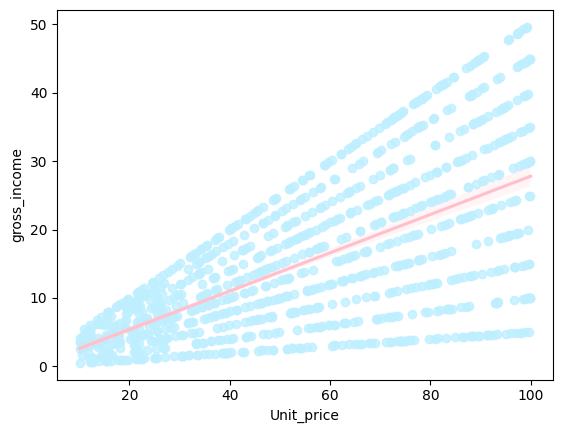

In [ ]:
sns.regplot(x = 'Unit_price',y = 'gross_income',data = df,scatter_kws={'color': '#BFEFFF'},line_kws={'color': 'pink'})


In [ ]:
df[['Unit_price','gross_income']].corr()

,Unit_price,gross_income
Unit_price,1.000000,0.633962
gross_income,0.633962,1.000000


**Insight:**

Positive Correlation: A correlation coefficient of approximately 0.63 indicates a moderate positive relationship between unit price and gross income. This suggests that higher-priced products tend to contribute more to total revenue.

Impact of Pricing on Revenue: The relationship highlights the importance of pricing strategy in enhancing gross income, indicating that premium product lines could be beneficial.

**Recommendations:**
Optimize Pricing Strategy: Focus on premium pricing for products with strong correlations to gross income.

Promote High-Value Products: Identify and market products with higher unit prices that generate significant gross income.

Explore Customer Preferences: Analyze customer segments willing to pay higher prices for more tailored marketing strategies.

Overall, the analysis emphasizes the role of pricing strategies in driving revenue.

**The Most Profitable Branch As Per Gross Income**

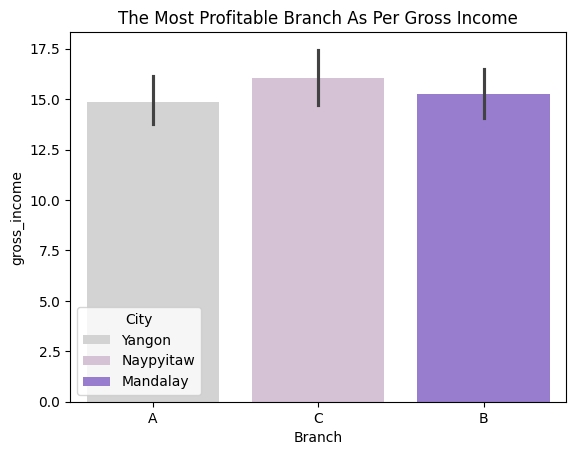

In [ ]:
sns.barplot(x='Branch', y='gross_income', data=df, hue=df['City'],palette=['lightgray', '#D8BFD8', '#9370DB'])
plt.title('The Most Profitable Branch As Per Gross Income')
plt.show()


In [ ]:
df[['Branch','gross_income']].value_counts()

Branch  gross_income
A       10.3260         2
B       12.5700         2
C       39.4800         2
A       0.6045          1
B       42.3150         1
                       ..
A       45.3250         1
        49.4900         1
B       0.8875          1
        0.9575          1
C       49.6500         1
Name: count, Length: 997, dtype: int64

**Insights:**
Branch Performance: The gross income values indicate that Branch C has the highest income at 39.4800 for two entries, suggesting it may be a key performer. This could indicate a successful strategy or product offering that resonates well with customers in that branch.

Comparative Analysis: Branch B shows a significant gross income of 42.3150 in one entry, suggesting it also performs well under certain conditions. In contrast, Branch A has lower values overall, with a maximum of 10.3260. This disparity indicates potential differences in customer engagement or sales strategies among the branches.
**Recommendations:**
Focus on Best Practices: Examine the strategies employed by Branch C and Branch B to identify best practices that can be implemented in Branch A to boost its performance.

Targeted Marketing: Consider tailored marketing efforts for Branch A to increase customer engagement and sales, possibly focusing on the types of products that are performing well in other branches.

**the Histogram of gross income**

In [ ]:
fig = px.histogram(df, x='gross_income', nbins=40, title='Distribution of gross income',color_discrete_sequence=['#D8BFD8'])
fig.show()

In [ ]:
fig = px.box(df, x='gross_income', title='Box Plot of Gross Income',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insights:**

Right-Skewed Distribution: Most gross income values are low, with a few high outliers, indicating that while many transactions generate low income, a small number significantly boost revenue.

Identifying Outliers: High-income outliers suggest potential premium transactions, which could inform successful sales strategies.

Revenue Opportunities: The concentration of lower incomes indicates potential for growth through upselling and premium product introductions.

**Recommendations:**
Analyze High-Income Transactions: Investigate high-income characteristics to replicate success.

Focus on Revenue Growth: Implement strategies to uplift lower-income segments.

Tailor Marketing Efforts: Adjust marketing strategies to appeal to both high-value and lower-income customers.

**The Distributionof Revenue**

In [ ]:
fig = px.histogram(df, x='Revenue', nbins=40, title='Distribution of Revenue',color_discrete_sequence=['#D8BFD8'])
fig.show()

In [ ]:
fig = px.box(df, x='Revenue', title='Box Plot of Revenue',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insight:**
the right-skewed histogram indicates a concentration of lower revenue values with opportunities for growth by targeting both high-value transactions and enhancing overall revenue strategies.

**The Distribution of Tax**

In [ ]:
fig = px.histogram(df, x='Tax 5%', nbins=40, title='Distribution of Tax',color_discrete_sequence=['#D8BFD8'])
fig.show()

In [ ]:
fig = px.box(df, x='Tax 5%', title='Box Plot of Tax',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insights:**
Right-Skewed Distribution: Most tax values are low, with a few instances of significantly higher taxes, indicating that many transactions incur lower tax rates.

Median Tax Value: The median of 0.60 shows that half of the transactions have lower tax burdens, likely reflecting lower-priced goods or effective tax management.

Maximum and Minimum Values: The range between a maximum tax of 2.48 and a minimum of 0.025 highlights variability in transaction sizes, suggesting that higher-value transactions incur more tax.

Tax Strategy Optimization Potential: The concentration of lower tax amounts presents opportunities for improved tax strategies and pricing adjustments.

**Recommendations:**
Analyze High Tax Transactions: Investigate the characteristics of transactions with higher tax rates to identify optimization opportunities.

**The Distribution of Cost of Goods Sold (COGS)**

<Axes: xlabel='Cost_of_Goods_Sold', ylabel='Count'>

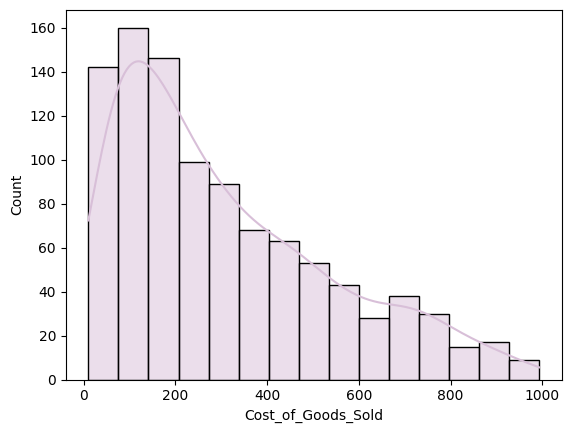

In [ ]:
sns.histplot(data = df , x = 'Cost_of_Goods_Sold',kde=True,color='#D8BFD8')


In [ ]:
fig = px.box(df, x='Cost_of_Goods_Sold', title='Box Plot of Cost of Goods Sold',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insights:**

Right-Skewed Distribution: Most Cost of Goods Sold (COGS) values are low, with a few significantly higher values, indicating that while many products have low costs, a minority have very high costs.

Median Value: The median COGS of 241.76 suggests that half of the products are sold at lower costs, while others contribute to higher COGS.

Maximum and Minimum Values: The range between a maximum of 993 and a minimum of 10.17 indicates substantial variability, reflecting diverse product categories that may need focused pricing or cost management.

**Recommendations:**
Analyze High COGS Products: Examine high COGS items to identify opportunities for cost reduction or margin improvement.

Cost-Effective Sourcing: Review supplier contracts to negotiate better rates for products with consistently high COGS.

Review Pricing Strategies: Ensure that pricing for high COGS products matches their perceived value and market demand.

**The Distribution of Ratings**

<Axes: xlabel='Rating', ylabel='Count'>

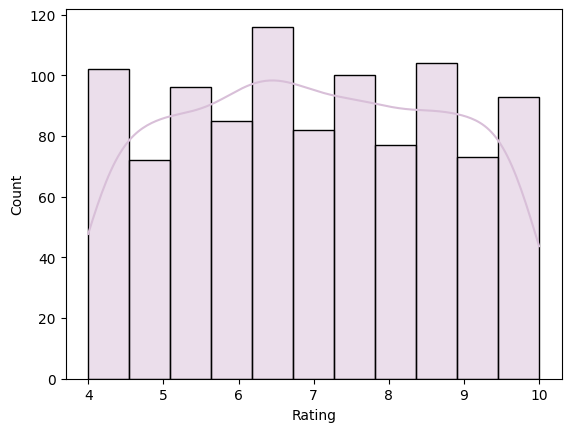

In [ ]:
sns.histplot(data = df , x = 'Rating',kde=True,color='#D8BFD8')



In [ ]:
fig = px.box(df, x='Rating', title='Box Plot of Rating',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insights:**

The histogram shows a normal distribution of ratings, indicating that most ratings cluster around a central value. This suggests a balanced perception of the products or services among users, with fewer extremely high or low ratings.

Central Tendency: The peak of the distribution indicates the most common rating, which can be useful for understanding general customer satisfaction. A normal distribution implies that most customers have a similar experience.
**Recommendations:**
Monitor Customer Feedback: Continuously track ratings to ensure they remain favorable and to quickly address any potential declines in satisfaction.

Identify Improvement Areas: Analyze specific feedback associated with lower ratings to pinpoint areas for improvement.

Maintain Quality Standards: Ensure consistent quality across products or services to maintain the normal distribution of positive ratings.


**Rating Frequency Across Different Product Lines**

In [ ]:
avgerg_Rating_group = df.groupby('Product_line')['Rating'].mean().reset_index()
avgerg_Rating_group

,Product_line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


In [ ]:
fig = px.bar(avgerg_Rating_group, x='Product_line', y='Rating',color_discrete_sequence=['#483D8B'],
             title='Rating Frequency Across Different Product Lines')
fig.show()

**Insights:** The Food and Beverages product line leads with the highest average rating of 7.11, indicating robust customer satisfaction, likely attributed to superior quality and effective marketing strategies. Conversely, the Home and Lifestyle category has the lowest average rating at 6.83, suggesting potential issues with product quality or overall customer experience. The significant variability in ratings across different product lines underscores the importance of addressing these disparities to enhance overall customer satisfaction. Additionally, the success of the Fashion Accessories category points to a strong consumer trend that warrants further exploration and understanding.

**Recommendations:**
Continuous Monitoring: Regularly assess ratings to monitor performance and adjust strategies as needed.
Market Research: Stay informed on market trends to ensure product offerings remain aligned with consumer demands.



**Distribtion Rating by Gross income**

<Axes: xlabel='Rating', ylabel='gross_income'>

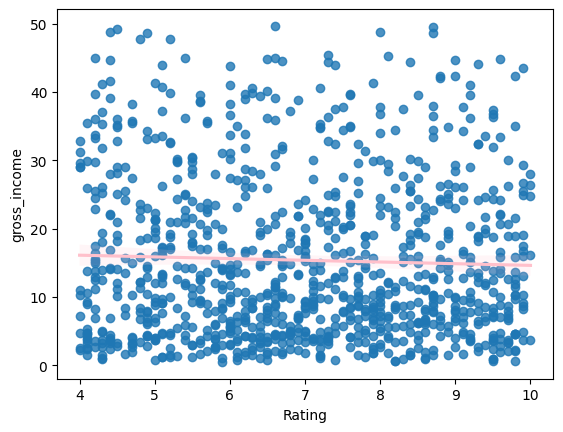

In [ ]:
sns.regplot(x = 'Rating',y = 'gross_income',data = df,line_kws={'color': 'pink'})


In [ ]:
df[['Rating','gross_income']].corr()

,Rating,gross_income
Rating,1.000000,-0.036442
gross_income,-0.036442,1.000000


**Insight:**
the weak negative correlation between ratings and gross income suggests that while customer feedback is valuable, it is not the sole determinant of revenue, indicating the need for a broader analysis of influencing factors.

**Box Plot of Ratings Across Different Product Lines**

In [ ]:
fig = px.box(df, x="Product_line",y='Rating', title='Box Plot of Ratings Across Different Product Lines',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insight:**
Central Tendency: By observing the median line within each box, we can see which product lines tend to receive higher ratings on average. A higher median indicates better overall customer satisfaction in that product line.

Variability: The length of the boxes and the presence of whiskers indicate the variability in ratings. A wider box suggests greater variability in customer experiences, while a narrower box indicates more consistent ratings.
the box plot serves as a valuable tool for understanding the distribution of ratings across different product lines, highlighting areas of strength and opportunities for improvement in customer satisfaction.

**Sales Quantity Overview by City**

In [ ]:
Quantity_by_City= df.groupby('City')['Quantity'].sum().reset_index()
Quantity_by_City

,City,Quantity
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


In [ ]:
fig = px.bar(Quantity_by_City, x='City', y='Quantity',color_discrete_sequence=['#D8BFD8'],
             title='Sales Quantity Overview by City')
fig.show()

**Insight:**
Highest Quantity: Yangon leads with 1859 units, indicating it is the most active market among the three cities. This suggests a strong demand or customer base in Yangon.

Moderate Performance: Naypyitaw follows closely with 1831 units, showing a competitive market but slightly less than Yangon. This could indicate a potential for growth if marketing efforts are intensified.

Lowest Quantity: Mandalay, with 1820 units, has the lowest quantity sold among the three cities. This might point to a need for improved sales strategies or understanding of customer preferences in this region.

**Recommendations:**
Focus on Yangon: Since Yangon has the highest sales, consider investing more marketing and promotional efforts there to further capitalize on the existing demand.

Analyze Naypyitaw: Explore what drives the sales in Naypyitaw and consider strategies to convert potential customers into buyers, as they are close in numbers to Yangon.

Boost Mandalay Sales: Investigate customer preferences and market conditions in Mandalay to develop targeted strategies that could increase sales.

**Total Quantity over the month per branch**

In [ ]:
branch_group = df.groupby(['Branch','month']).agg({"Quantity":'sum'}).reset_index()
branch_group

,Branch,month,Quantity
0,A,Feb,493
1,A,Jan,685
2,A,March,681
3,B,Feb,624
4,B,Jan,600
5,B,March,596
6,C,Feb,537
7,C,Jan,680
8,C,March,614


In [ ]:
fig = px.bar(branch_group, x='month', y='Quantity', color='Branch',text="Branch",title = 'Total Quantity over the month per branch',color_discrete_sequence=['lightgray', '#D8BFD8', '#9370DB'])

fig.show()

**Insights:**
Branch A: Highest sales in January (685 units), dip in February (493), slight recovery in March (681).
Branch B: Lower starting sales in January (600), slight increase in February (624), decline in March (596).
Branch C: Solid January (680), drop in February (537), slight improvement in March (614).
Comparative Analysis
Branch A outperforms B and C, especially in January and March.
All branches face a sales decline in February, indicating a potential seasonal challenge.
**Recommendations:**
Investigate February Declines: Analyze reasons for lower sales and consider promotions.
Leverage Strong Performers: Apply successful strategies from Branch A to others.
Monitor Monthly Trends: Track sales closely to manage inventory and marketing effectively.

**Total Quantity over the Month per branch and Product line**

In [ ]:
total_quantity_group= df.groupby(['Branch','month',"Product_line"]).agg({"Quantity":'sum'}).reset_index()
total_quantity_group


,Branch,month,Product_line,Quantity
0,A,Feb,Electronic accessories,89
1,A,Feb,Fashion accessories,79
2,A,Feb,Food and beverages,127
3,A,Feb,Health and beauty,55
4,A,Feb,Home and lifestyle,68
5,A,Feb,Sports and travel,75
6,A,Jan,Electronic accessories,117
7,A,Jan,Fashion accessories,114
8,A,Jan,Food and beverages,90
9,A,Jan,Health and beauty,70


In [ ]:
fig = px.bar(total_quantity_group, x='month', y='Quantity', color='Branch', hover_data=[ 'Product_line'],color_discrete_sequence=['lightgray', '#D8BFD8', '#9370DB']
,text="Branch",title = 'Total Quantity over the Month per branch and Product line')

fig.show()

**Insight:**
into Product Lines
Analyzing product lines within each branch can reveal which products are performing best. For instance, if "Fashion Accessories" consistently shows high sales in a particular branch, it may suggest that marketing efforts for this line are effective and yielding positive results.
**Recommendations:**
focus on High-Performing Branches: If certain branches show significantly higher sales, consider analyzing their strategies and replicating successful practices in other branches.

Improvement of Underperforming Lines
Efforts should be focused on improving the lines that are underperforming. Identifying the reasons for lower sales can help in developing targeted marketing strategies or product enhancements to boost their performance.

**Distribution of gross income by Tax**




<Axes: xlabel='gross_income', ylabel='Tax 5%'>

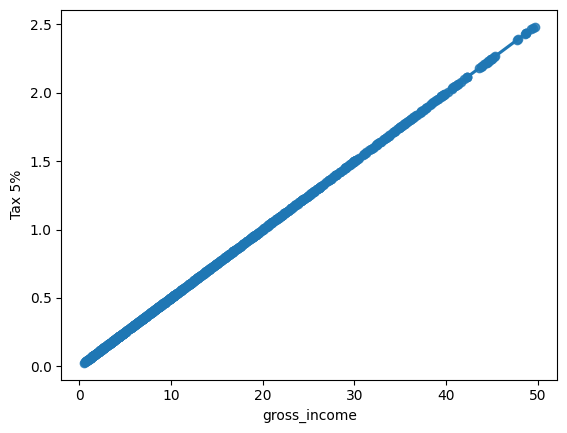

In [ ]:
sns.regplot(x = 'gross_income',y = 'Tax 5%',data = df)


In [ ]:
df[["gross_income","Tax 5%"]].corr()

,gross_income,Tax 5%
gross_income,1.0,1.0
Tax 5%,1.0,1.0


**Insights:**
Perfect Correlation: The correlation of 1.0 between gross income and the 5% tax indicates a perfect linear relationship. This suggests that as gross income increases, the tax amount also increases proportionally.

Predictability: The strong correlation allows for predictability in tax calculations. Knowing the gross income enables accurate forecasting of the tax liability, facilitating better financial planning.



**Monthly Gross Income Analysis Based on COGS and Revenue**

In [ ]:
total_gross_incom_group= df.groupby(['month','Cost_of_Goods_Sold',"Revenue"]).agg({"gross_income":'sum'}).reset_index()
total_gross_incom_group

,month,Cost_of_Goods_Sold,Revenue,gross_income
0,Feb,10.17,10.6785,0.5085
1,Feb,12.54,13.1670,0.6270
2,Feb,13.98,14.6790,0.6990
3,Feb,18.33,19.2465,0.9165
4,Feb,19.70,20.6850,0.9850
...,...,...,...,...
993,March,897.57,942.4485,44.8785
994,March,898.38,943.2990,44.9190
995,March,899.64,944.6220,44.9820
996,March,906.50,951.8250,45.3250


In [ ]:
fig = px.bar(total_gross_incom_group, x='month', y='gross_income', color='Cost_of_Goods_Sold', hover_data=["Revenue"],text="Cost_of_Goods_Sold",title = 'Monthly Gross Income Analysis Based on COGS and Revenue ')

fig.show()


**Insights:**

Trend Analysis: The data shows a clear upward trend in both revenue and gross income as the cost of goods sold increases, indicating that higher costs are associated with higher sales.

Profitability: The gross income values suggest that the business maintains a consistent profit margin across different levels of costs and revenues, highlighting effective cost management.

Seasonal Variations: If the bar chart is segmented by month, it can reveal seasonal patterns in sales and costs, providing insight into peak sales periods
The peak was in January

**Total Revenue over the Branch for cogs and Gross Margin Percentage**

In [ ]:
total_Revenue_group= df.groupby(['Branch','Cost_of_Goods_Sold',"gross_margin_percentage"]).agg({"Revenue":'sum'}).reset_index()
total_Revenue_group

,Branch,Cost_of_Goods_Sold,gross_margin_percentage,Revenue
0,A,12.09,4.76%,12.6945
1,A,15.34,4.76%,16.1070
2,A,15.50,4.76%,16.2750
3,A,18.28,4.76%,19.1940
4,A,18.33,4.76%,19.2465
...,...,...,...,...
992,C,955.80,4.76%,1003.5900
993,C,972.10,4.76%,1020.7050
994,C,975.00,4.76%,1023.7500
995,C,985.20,4.76%,1034.4600


In [ ]:
fig = px.bar(total_Revenue_group, x='Branch', y='Revenue', color='Cost_of_Goods_Sold', hover_data=["gross_margin_percentage"],text="Cost_of_Goods_Sold",title = 'Total Revenue over the Branch for cogs and Gross Margin Percentage')

fig.show()


**Insights:**
Consistent Profit Margin: The stable gross margin percentage at 4.76% indicates that the company maintains consistent margins across all branches, reflecting stability in pricing strategies.

Rising Cost of Goods Sold: There is an increasing trend in the cost of goods sold, suggesting that the company may face challenges in managing costs in the future.

Increasing Revenue: Revenue across all branches also shows a gradual rise, indicating success in boosting sales.

Branch Performance Strategy: Analyzing performance by branch can reveal which branches are performing better or need improvement, aiding in informed strategic decision-making.

**The profit margin is stable** because the values of revenue and cost of goods sold are close to each other. This indicates that the company operates efficiently in managing its costs, contributing to profit stability. It also highlights the importance of maintaining a good balance between costs and revenues to achieve sustainable financial performance.

**Distribution of Gross incom by cost of good sold**



<Axes: xlabel='gross_income', ylabel='Cost_of_Goods_Sold'>

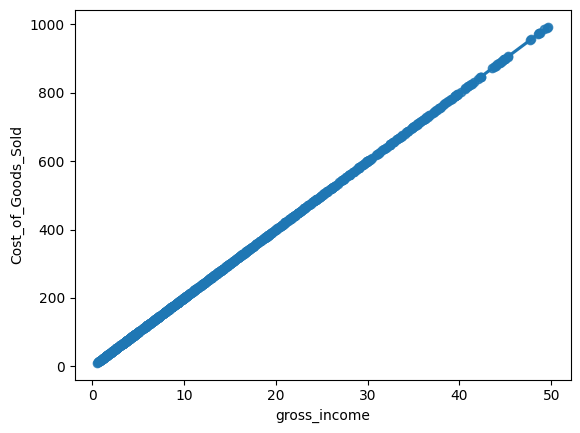

In [ ]:
sns.regplot(x = 'gross_income',y = 'Cost_of_Goods_Sold',data = df)


In [ ]:
df[['gross_income','Cost_of_Goods_Sold']].corr()

,gross_income,Cost_of_Goods_Sold
gross_income,1.0,1.0
Cost_of_Goods_Sold,1.0,1.0


**Insight:**
Positive Correlation: The correlation between gross income and the cost of goods sold is 1.0, indicating a perfect linear relationship. This suggests that as the cost of goods sold increases, gross income increases proportionately.

Cost Management Impact: This strong correlation highlights the importance of managing costs effectively to maintain or enhance gross income levels.

Revenue Strategy: Understanding this relationship can help in formulating pricing and sales strategies, ensuring that increases in costs are matched by corresponding increases in revenue to sustain profitability.

**Distribution of Gross income by Revenue**





<Axes: xlabel='gross_income', ylabel='Revenue'>

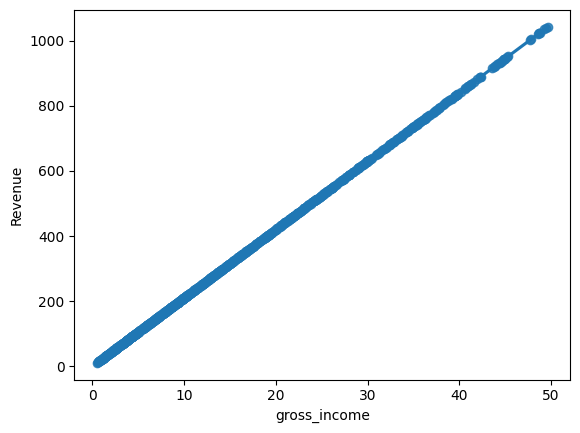

In [ ]:
sns.regplot(x = 'gross_income',y = 'Revenue',data = df)


In [ ]:
df[['gross_income','Revenue']].corr()

,gross_income,Revenue
gross_income,1.0,1.0
Revenue,1.0,1.0


**Insights:**
Perfect Correlation: The correlation between gross income and revenue is 1.0, indicating a perfect linear relationship. This suggests that any increase in revenue directly results in a corresponding increase in gross income.

Revenue Impact on Profitability: This strong relationship highlights the critical role of revenue generation in driving profitability. Maintaining or increasing revenue will directly enhance gross income.

Strategic Focus: Companies should focus on strategies that boost revenue, as this will have a direct positive effect on gross income, contributing to overall financial health.

**Distribution of Customer Type by Product Line**

In [ ]:
df['Customer_type'].unique()

array(['Member', 'Normal'], dtype=object)

In [ ]:
count_data = df.value_counts(['Customer_type', 'Product_line']).unstack()

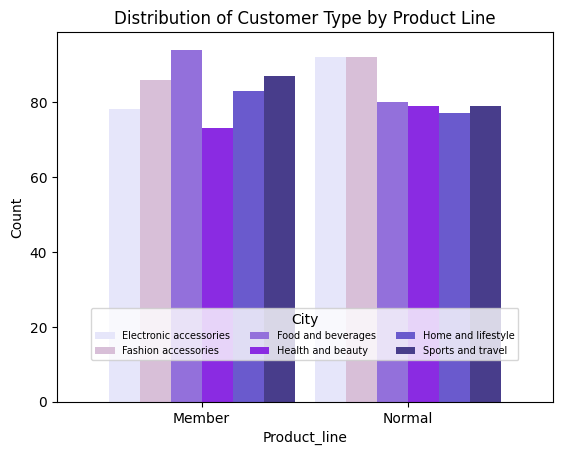

In [ ]:
colors = ['#E6E6FA', '#D8BFD8', '#9370DB', '#8A2BE2', '#6A5ACD', '#483D8B']

count_data.plot(kind='bar', width=0.9,color=colors)
plt.title('Distribution of Customer Type by Product Line')
plt.xlabel('Product_line')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='City',prop={'size':7},loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=3)
plt.show()

**Insights:**
Product Line Preferences: The bar chart displays the distribution of customer types (Members and Normal) across different product lines, highlighting which products are favored by each group.



**Total Rating Contributions by Customer Type**

In [ ]:
avg_Rating_group = df.groupby('Customer_type')['Rating'].mean().reset_index()
avg_Rating_group

,Customer_type,Rating
0,Member,6.940319
1,Normal,7.005210


In [ ]:
fig = px.bar(avg_Rating_group, x='Customer_type', y='Rating',color_discrete_sequence=['#D8BFD8'],
             title=' Total Rating Contributions by Customer Type',
             labels={'Rating': ' Rating'})

fig.show()

**Insights:**
Close Ratings: The ratings for both Members (3,477.1) and Normal customers (3,495.6) are very similar, indicating a generally consistent level of satisfaction across both groups.

Slight Edge for Normal Customers: Normal customers have a slightly higher rating, suggesting they may feel more satisfied or engaged compared to Members. This could prompt further investigation into the experiences of each group.

**Box Plot of Gross Income by Customer Type**

In [ ]:
fig = px.box(df, x="Customer_type",y='gross_income', title='Box Plot of Gross Income by Customer Type',color_discrete_sequence=['#D8BFD8'])
fig.show()

**Insights:**
Gross Income Comparison: Members show a higher median gross income (12.668) compared to Normal customers (11.306). This indicates that Members generally generate more income.

Range of Income: Members have a wider range of gross income, with a maximum of 49.65 and a minimum of 0.50. In contrast, Normal customers have a maximum of 49.49 and a minimum of 0.60, suggesting more variability in income among Members.

Potential for Growth: The higher median and broader range for Members could indicate opportunities for targeted strategies to further boost income for Normal customers, possibly by enhancing their engagement or offering incentives to increase spending.

**Heatmap of Gross income by City and Customer Type**

In [ ]:
fig = px.density_heatmap(df, x='Customer_type', y='City', z='gross_income',
                         title='Heatmap of Gross income by City and Customer Type',
                         color_continuous_scale='YlGnBu')

fig.show()

**Insights:**
Highest Income: The city of Naypyitaw has the highest gross income for Members, reaching 2,708.633. This indicates strong performance in this area and suggests that Members in Naypyitaw are contributing significantly to overall income.

Customer Type Distribution: The heatmap visually represents how different customer types (Members vs. Normal) perform across various cities, allowing for easy identification of where each customer segment is thriving.

Targeted Marketing Opportunities: Given the high income for Members in Naypyitaw, there may be potential for targeted marketing strategies to further engage this customer base, such as exclusive offers or loyalty programs that could boost overall sales.

City Performance: The data can help identify other cities with potential for growth, where strategies can be implemented to increase the gross income of Normal customers to match or exceed those of Members.